[NOTE: In the transformations below, if the ToTensor option is not applied then transformation output is a PIL image.]

# RoadMap 5 - Tranformations - General

    1. Applying general transformations on a single image/numpy-array/tensor
        1.1.  To Tensor               - Convert a PIL Image or numpy.ndarray to tensor.
        1.2.  To PIL Image            - Convert tensor to PIL image
        1.3.  Center Crop             - Crops PIL image from center
        1.4.  Color Jitter            - Randomly change the brightness, contrast and saturation of an image.
        1.5.  Five Crop               - Crop the given PIL Image into four corners and the central crop
        1.6.  Grayscale               - Convert RGB to grayscale
        1.7.  Padding                 - Pad the given PIL Image on all sides with the given “pad” value.
        1.8.  Random Affine           - Random affine transformation of the image keeping center invariant.
        1.9.  Random Apply            - Apply randomly a list of transformations with a given probability.
        1.10. Random Crop             - Crop the given PIL Image at a random location.
        1.11. Random Choice           - Apply single transformation randomly picked from a list.
        1.12. Random Grayscale        - Convert RGB to grayscale.
        1.13. Random Horizontal Flip  - Horizontally flip the given PIL Image randomly with a given probability.
        1.14. Random Resized Crop     - Crop the given PIL Image to random size and aspect ratio.
        1.15. Random Rotation         - Rotate the image by angle.
        1.16. Random Vertical Flip    - Vertically flip the given PIL Image randomly with a given probability.
        1.17. Resize                  - Resize the input PIL Image to the given size.
        1.18. Normalize               - Normalize a tensor image with mean and standard deviation. 
        
        
    2. Applying functional transformations on a single image/numpy-array/tensor
        2.1.  Adjust Brightness       - Adjust brightness of an Image.
        2.2.  Adjust Contrast         - Adjust contrast of an Image.
        2.3.  Adjust Gamma            - Perform gamma correction on an image.
        2.4.  Adjust Hue              - Adjust Hue of an Image.
        2.5.  Adjust Saturation       - Adjust Saturation of an Image.
        2.6.  Affine                  - Apply affine transformation on the image keeping image center invariant.
        2.7.  Crop                    - Crop the given PIL Image.
        2.8.  Horizontal Flip         - Horizontally flip the given PIL Image.
        2.9.  Normalize               - Normalize a tensor image with mean and standard deviation.
        2.10. Padding                 - Pad the given PIL Image on all sides with specified padding mode and fill value.
        2.11. Resize                  - Resize the input PIL Image to the given size.
        2.12. Resized Crop            - Crop the given PIL Image and resize it to desired size.
        2.13. Rotate                  - Rotate the image by angle.
        2.14. To Grayscale            - Convert image to grayscale version of image.
        2.15. To Tensor               - Convert a PIL Image or numpy.ndarray to tensor.
        2.16. To Pillow Image         - Convert a tensor back to Pillow Image.
        2.17. Vertical Flip           - Vertically flip the given PIL Image.
        
        
    3. Applying transformation set on a sample dataset (visualizing data)
        
        
        
        

## Extra Blog Resources

1. https://medium.com/@ml_kid/what-is-transform-and-transform-normalize-lesson-4-neural-networks-in-pytorch-ca97842336bd

2. https://www.analyticsvidhya.com/blog/2019/07/pytorch-transformers-nlp-python/

In [1]:
import torch
import numpy as np
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision


In [2]:
print(dir(transforms))

['CenterCrop', 'ColorJitter', 'Compose', 'FiveCrop', 'Grayscale', 'Lambda', 'LinearTransformation', 'Normalize', 'Pad', 'RandomAffine', 'RandomApply', 'RandomChoice', 'RandomCrop', 'RandomErasing', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomOrder', 'RandomPerspective', 'RandomResizedCrop', 'RandomRotation', 'RandomSizedCrop', 'RandomVerticalFlip', 'Resize', 'Scale', 'TenCrop', 'ToPILImage', 'ToTensor', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'functional', 'transforms']


In [3]:
image_name = "dog.jpg"

In [4]:
# From PIL or Numpy Array To Tensor
'''
1.1. ToTensor - Convert a PIL Image or numpy.ndarray to tensor.
'''

transform = transforms.Compose([
                    transforms.ToTensor()])


image = Image.open(image_name)
print("Initial data type - ", type(image))
image = transform(image).float()
print("Final data type - ", type(image))


Initial data type -  <class 'PIL.JpegImagePlugin.JpegImageFile'>
Final data type -  <class 'torch.Tensor'>


In [5]:
# From Tensor to PIL 

'''
1.2. ToPILImage - Convert tensor to PIL image
    - mode 
        - If mode is None (default) there are some assumptions made about the input data: 1. 
        - If the input has 3 channels, the mode is assumed to be RGB. 2. If the input has 4 channels, 
                the mode is assumed to be RGBA. 
        - If the input has 1 channel, the mode is determined by the data type (i,e, int, float, short)
'''

transform = transforms.Compose([
                    transforms.ToPILImage(mode=None)])

print("Initial data type - ", type(image))
image = transform(image)
print("Final data type - ", type(image))

Initial data type -  <class 'torch.Tensor'>
Final data type -  <class 'PIL.Image.Image'>


torch.Size([3, 224, 224]) <class 'torch.Tensor'>


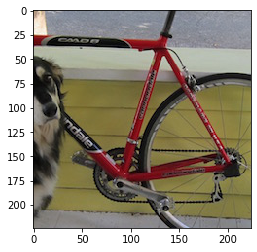

In [6]:
# Centre Crop Transform

'''
1.3. CenterCrop - Crops PIL image from center
    - size --> Size of cropped image
'''

transform = transforms.Compose([transforms.CenterCrop(224),\
                    transforms.ToTensor()])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)

torch.Size([3, 576, 768]) <class 'torch.Tensor'>


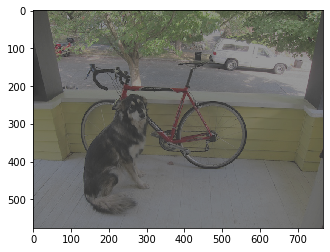

In [7]:
# Color jitter

'''
1.4. ColorJitter - Randomly change the brightness, contrast and saturation of an image.
    - brightness (float) – How much to jitter brightness. brightness_factor is \
        chosen uniformly from [max(0, 1 - brightness), 1 + brightness].
    - contrast (float) – How much to jitter contrast. contrast_factor is chosen \
        uniformly from [max(0, 1 - contrast), 1 + contrast].
    - saturation (float) – How much to jitter saturation. saturation_factor is \
        chosen uniformly from [max(0, 1 - saturation), 1 + saturation].
    - hue (float) – How much to jitter hue. hue_factor is chosen \
        uniformly from [-hue, hue]. Should be >=0 and <= 0.5.
'''

transform = transforms.Compose([
    transforms.ColorJitter(brightness=1.5, contrast=2, saturation=0.2, hue=0),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)

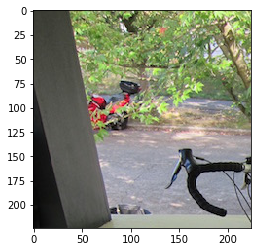

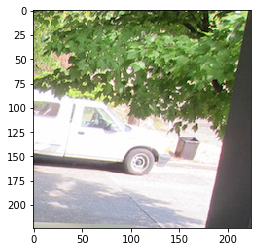

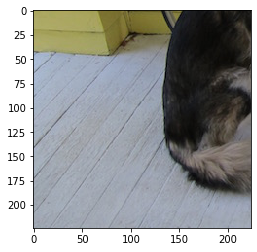

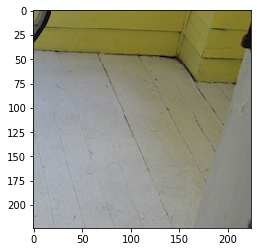

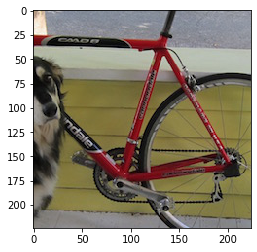

In [8]:
# Five Crop
'''
1.5. FiveCrop - Crop the given PIL Image into four corners and the central crop 
    - size --> Size of cropped image
'''

transform = transforms.Compose([transforms.FiveCrop(224)])


image = Image.open(image_name)
images = transform(image)
for im in images:
    plt.figure()
    plt.imshow(im)


torch.Size([1, 576, 768]) <class 'torch.Tensor'>


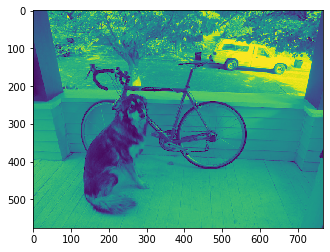

In [9]:
# GrayScale Conversion
'''
1.6. Grayscale - Convert RGB to grayscale
    - num_channels --> 1
'''

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)

torch.Size([3, 264, 264]) <class 'torch.Tensor'>


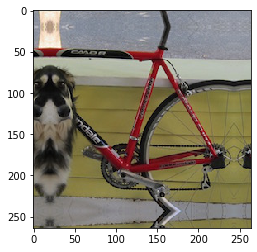

In [10]:
# Padding

'''
1.7. Pad
    - padding (int or tuple) – Padding on each border. If a single int is provided this is used to pad all borders. \
        If tuple of length 2 is provided this is the padding on left/right and top/bottom respectively. \
        If a tuple of length 4 is provided this is the padding for the left, top, right and bottom borders respectively.
        it is used to fill R, G, B channels respectively. 
        This value is only used when the padding_mode is constant
    - padding_mode (str) –
        Type of padding. Should be: constant, edge, reflect or symmetric. Default is constant.
        constant: pads with a constant value, this value is specified with fill
        edge: pads with the last value at the edge of the image
        reflect: pads with reflection of image without repeating the last value on the edge
        symmetric: pads with reflection of image repeating the last value on the edge
'''

transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.Pad(20, fill=0, padding_mode='reflect'),
    transforms.ToTensor()
    ])

image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)


torch.Size([3, 224, 224]) <class 'torch.Tensor'>


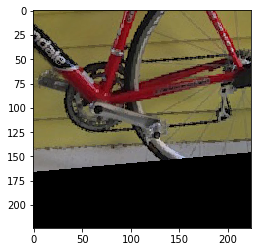

In [11]:
# Random Affine

'''
1.8. RandomAffine
    - degrees (sequence or float or int) – Range of degrees to select from. 
        If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees). 
        Set to 0 to deactivate rotations.
    - translate (tuple, optional) – tuple of maximum absolute fraction for horizontal and vertical translations. 
        For example translate=(a, b), then horizontal shift is randomly sampled in 
        the range -img_width * a < dx < img_width * a and vertical shift is randomly sampled 
        in the range -img_height * b < dy < img_height * b. Will not translate by default.
    - scale (tuple, optional) – scaling factor interval, e.g (a, b), then scale is randomly sampled from the 
        range a <= scale <= b. Will keep original scale by default.
    - shear (sequence or float or int, optional) – Range of degrees to select from. 
        If degrees is a number instead of sequence like (min, max), the range of degrees will 
        be (-degrees, +degrees). Will not apply shear by default
    - resample ({PIL.Image.NEAREST, PIL.Image.BILINEAR, PIL.Image.BICUBIC}, optional) – An optional resampling filter. 
        See filters for more information. If omitted, or if the image has mode “1” or “P”, 
        it is set to PIL.Image.NEAREST.
    - fillcolor (int) – Optional fill color for the area outside the transform in the output image. (Pillow>=5.0.0)


'''
transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.RandomAffine(15.0, translate=(0.1,0.5), scale=(1.2, 1.5), shear=15.0, resample=False, fillcolor=0),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)



(768, 576) <class 'PIL.JpegImagePlugin.JpegImageFile'>


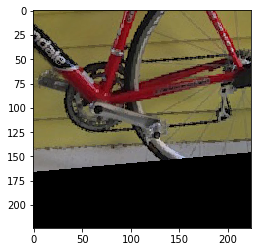

In [15]:
# Random Apply

'''
1.9. RandomApply - Apply randomly a list of transformations with a given probability
    - transforms (list or tuple) – list of transformations
    - p (float) – probability

'''

transform = transforms.RandomApply([
    transforms.CenterCrop(224),
    transforms.RandomAffine(15.0, translate=(0.1,0.5), scale=(1.2, 1.5), shear=15.0, resample=False, fillcolor=0)
    ], p=0.6)


image = Image.open(image_name)
image = transform(image)
print(image.size, type(image))
plt.imshow(img)

torch.Size([3, 251, 251]) <class 'torch.Tensor'>


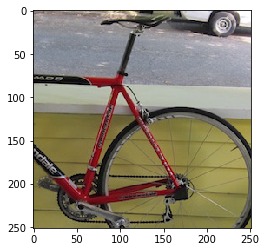

In [16]:
# Random Crop

'''
1.10. RandomCrop - Crop the given PIL Image at a random location.
    - size (sequence or int) – Desired output size of the crop. If size is an int instead of sequence like (h, w), 
        a square crop (size, size) is made.
    - padding (int or sequence, optional) – Optional padding on each border of the image. Default is None, 
        i.e no padding. If a sequence of length 4 is provided, it is used to pad left, top, right, bottom borders 
        respectively. If a sequence of length 2 is provided, it is used to pad left/right, top/bottom borders, 
        respectively.
    - pad_if_needed (boolean) – It will pad the image if smaller than the desired size to avoid raising an exception.
    - fill – Pixel fill value for constant fill. Default is 0. If a tuple of length 3, it is used to 
        fill R, G, B channels respectively. This value is only used when the padding_mode is constant
    - padding_mode – Type of padding. Should be: constant, edge, reflect or symmetric. Default is constant.
        constant: pads with a constant value, this value is specified with fill
        edge: pads with the last value on the edge of the image
        reflect: pads with reflection of image (without repeating the last value on the edge)
        symmetric: pads with reflection of image (repeating the last value on the edge)
'''

transform = transforms.Compose([
    transforms.RandomCrop(251),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)


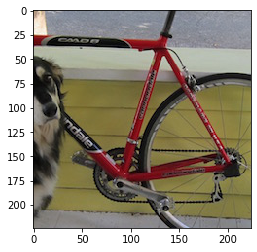

In [17]:
# Random Choice

'''
1.11. RandomChoice - Apply single transformation randomly picked from a list
'''

transform = transforms.RandomChoice([
    transforms.CenterCrop(224),
    transforms.RandomAffine(15.0, translate=(0.1,0.5), scale=(1.2, 1.5), shear=15.0, resample=False, fillcolor=0)
    ])


image = Image.open(image_name)
img = transform(image)
plt.imshow(img)

torch.Size([3, 576, 768]) <class 'torch.Tensor'>


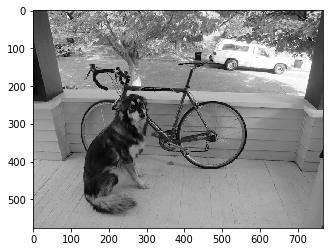

In [18]:
# Random GrayScale

'''
1.12. RandomGrayscale - Convert RGB to grayscale
    - p -> Probability of this transformation being applied
    
'''

transform = transforms.Compose([
    transforms.RandomGrayscale(p=0.7),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)

torch.Size([3, 576, 768]) <class 'torch.Tensor'>


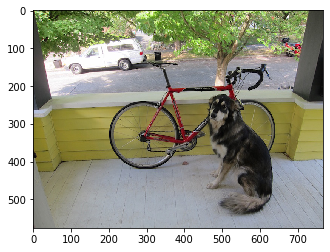

In [19]:
# Random Horizontal Flip

'''
1.13. RandomHorizontalFlip - Horizontally flip the given PIL Image randomly with a given probability.
    - p -> Probability of this transformation being applied
'''

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.7),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)

torch.Size([3, 224, 224]) <class 'torch.Tensor'>


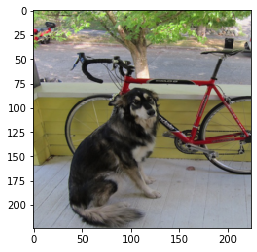

In [20]:
# Random Resized Crop

'''
1.14. RandomResizedCrop - Crop the given PIL Image to random size and aspect ratio.
'''

transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)



torch.Size([3, 576, 768]) <class 'torch.Tensor'>


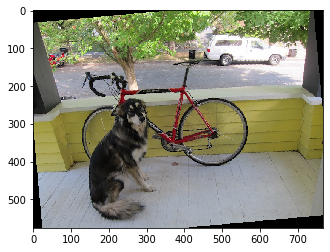

In [21]:
# Random Rotation

'''
1.15. RandomRotation - Rotate the image by angle.
'''

transform = transforms.Compose([
    torchvision.transforms.RandomRotation(20, resample=False, expand=False, center=None),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)


torch.Size([3, 576, 768]) <class 'torch.Tensor'>


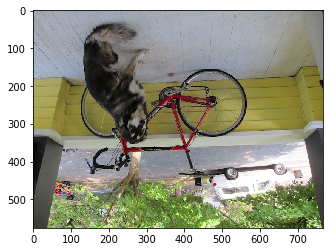

In [22]:
# Random Vertical Flip

'''
1.16. RandomVerticalFlip - Vertically flip the given PIL Image randomly with a given probability.
        - p -> Probability of this transformation being applied
'''

transform = transforms.Compose([
    transforms.RandomVerticalFlip(p=0.7),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)


torch.Size([3, 224, 298]) <class 'torch.Tensor'>


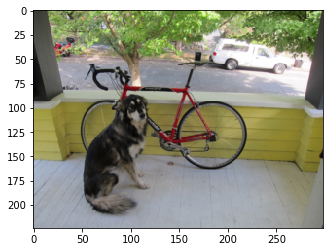

In [23]:
# Resize

'''
1.17. Resize - Resize the input PIL Image to the given size.
        - size (sequence or int) – Desired output size. If size is a sequence like (h, w), output size will be 
            matched to this. If size is an int, smaller edge of the image will be matched to this number. 
            i.e, if height > width, then image will be rescaled to (size * height / width, size)
        - interpolation (int, optional) – Desired interpolation. Default is PIL.Image.BILINEAR
'''

transform = transforms.Compose([
    transforms.Resize(size=224),
    transforms.ToTensor()
    ])


image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)


torch.Size([3, 576, 768]) <class 'torch.Tensor'>


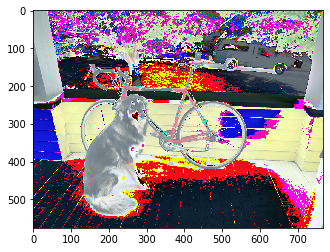

In [24]:
# Normalize

'''
1.18. Normalize -  Normalize a tensor image with mean and standard deviation. 
        - mean (sequence) – Sequence of means for each channel.
        - std (sequence) – Sequence of standard deviations for each channel.

'''

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[-0.40760392156, -0.45795686274, -0.48501960784], std=[1,1,1])
    ])

# Visualizing color jitter
image = Image.open(image_name)
image = transform(image).float()
print(image.shape, type(image))
to_pil = torchvision.transforms.ToPILImage()
img = to_pil(image)
plt.imshow(img)

# Functional Transforms

Instead of being applied as composite transformations these take in input as functional arguments

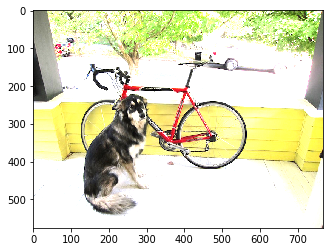

In [25]:
# Adjust Brightness

'''
2.1. adjust_brightness - Adjust brightness of an Image.
    - img (PIL Image) – PIL Image to be adjusted.
    - brightness_factor (float) – How much to adjust the brightness. Can be any non negative number. 
        0 gives a black image, 1 gives the original image while 2 increases the brightness by a factor of 2.

'''

img = Image.open(image_name)
image = transforms.functional.adjust_brightness(img, brightness_factor=2.0)
plt.imshow(image)

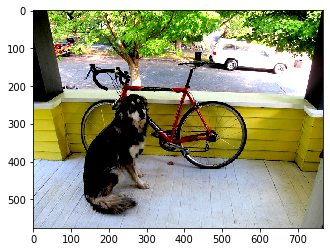

In [26]:
# Adjust Contrast

'''
2.2. adjust_contrast - Adjust contrast of an Image.
    - img (PIL Image) – PIL Image to be adjusted.
    - contrast_factor (float) – How much to adjust the brightness. Can be any non negative number. 
        0 gives a black image, 1 gives the original image while 2 increases the brightness by a factor of 2.

'''

img = Image.open(image_name)
image = transforms.functional.adjust_contrast(img, contrast_factor=2.0)
plt.imshow(image)

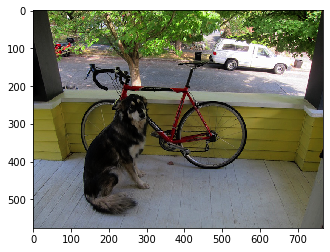

In [27]:
# Adust Gamma

'''
2.3. adjust_gamma - Perform gamma correction on an image..
    - img (PIL Image) – PIL Image to be adjusted.
    - gamma (float) – Non negative real number, same as γ in the equation. gamma larger than 1 make the shadows darker, 
        while gamma smaller than 1 make dark regions lighter.
    - gain (float) – The constant multiplier.

'''

img = Image.open(image_name)
image = transforms.functional.adjust_gamma(img, 1.5, gain=1)
plt.imshow(image)

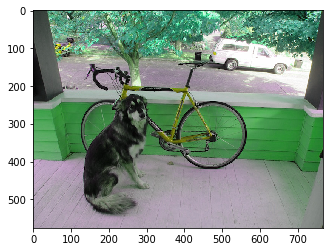

In [28]:
# Adjust Hue

'''
2.4. adjust_hue - Adjust Hue of an Image.
    - img (PIL Image) – PIL Image to be adjusted.
    - hue_factor (float) – How much to shift the hue channel. Should be in [-0.5, 0.5]. 0.5 and -0.5 give 
        complete reversal of hue channel in HSV space in positive and negative direction respectively. 0 means no shift. 
        Therefore, both -0.5 and 0.5 will give an image with complementary colors while 0 gives the original image.

'''

img = Image.open(image_name)
image = transforms.functional.adjust_hue(img, hue_factor=0.2)
plt.imshow(image)

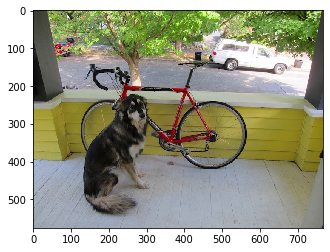

In [29]:
# Adjust Saturation

'''
2.5. adjust_saturation - Adjust Hue of an Image.
    - img (PIL Image) – PIL Image to be adjusted.
    - saturation_factor (float) –  How much to adjust the saturation. 
        0 will give a black and white image, 
        1 will give the original image while 2 will enhance the saturation by a factor of 2.

'''

img = Image.open(image_name)
image = transforms.functional.adjust_saturation(img, saturation_factor=1.2)
plt.imshow(image)

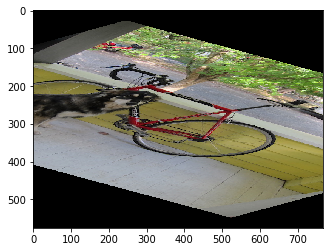

In [30]:
# Affine

'''
2.6. affine - Apply affine transformation on the image keeping image center invariant
    - img (PIL Image) – PIL Image to be rotated.
    - angle (float or int) – rotation angle in degrees between -180 and 180, clockwise direction.
    - translate (list or tuple of python:integers) – horizontal and vertical translations (post-rotation translation)
    - scale (float) – overall scale
    - shear (float) – shear angle value in degrees between -180 to 180, clockwise direction.
    - resample (PIL.Image.NEAREST or PIL.Image.BILINEAR or PIL.Image.BICUBIC, optional) – 
        An optional resampling filter. See filters for more information. 
        If omitted, or if the image has mode “1” or “P”, it is set to PIL.Image.NEAREST.
    - fillcolor (int) – Optional fill color for the area outside the transform in the output image. (Pillow>=5.0.0)

'''

img = Image.open(image_name)
image = transforms.functional.affine(img, 15.0, [1,0], 1.5, 60.0, resample=0, fillcolor=None)
plt.imshow(image)



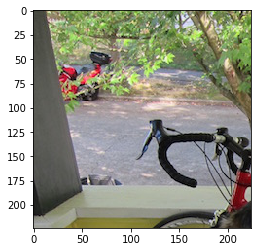

In [31]:
# Crop

'''
2.7. crop - Crop the given PIL Image.
    - img (PIL Image) – Image to be cropped.
    - i – Upper pixel coordinate.
    - j – Left pixel coordinate.
    - h – Height of the cropped image.
    - w – Width of the cropped image.

'''

img = Image.open(image_name)
image = transforms.functional.crop(img, 30, 30, 224, 224)
plt.imshow(image)


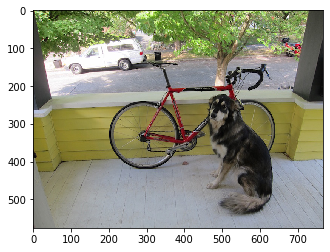

In [32]:
# Horizontal Flip

'''
2.8. hflip - Horizontally flip the given PIL Image.
    - img (PIL Image)
'''

img = Image.open(image_name)
image = transforms.functional.hflip(img)
plt.imshow(image)


<class 'torch.Tensor'> torch.Size([3, 576, 768])


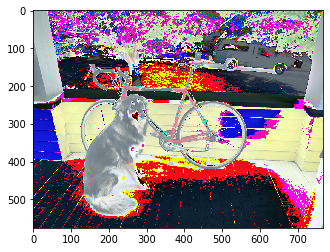

In [33]:
# Normalize

'''
2.9. normalize - Normalize a tensor image with mean and standard deviation.
    - tensor (Tensor) – Tensor image of size (C, H, W) to be normalized.
    - mean (sequence) – Sequence of means for each channel.
    - std (sequence) – Sequence of standard deviations for each channely.

'''

transform = transforms.Compose([
                    transforms.ToTensor()])


img = Image.open(image_name)
tensor = transform(img).float()
print(type(tensor), tensor.shape)
image_tensor = transforms.functional.normalize(tensor,mean=[-0.40760392156, -0.45795686274, -0.48501960784], std=[1,1,1])
to_pil = torchvision.transforms.ToPILImage()
image = to_pil(image_tensor)
plt.imshow(image)



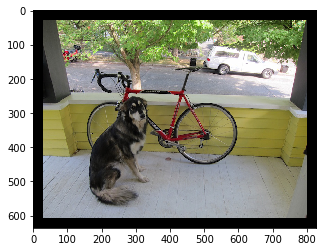

In [34]:
# Padding

'''
2.10. pad - Pad the given PIL Image on all sides with specified padding mode and fill value.
        - img (PIL Image) – Image to be padded.
        - padding (int or tuple) – Padding on each border. If a single int is provided this is used to pad all borders. 
            If tuple of length 2 is provided this is the padding on left/right and top/bottom respectively. 
            If a tuple of length 4 is provided this is the padding for the left, top, right and 
            bottom borders respectively.
        - fill – Pixel fill value for constant fill. Default is 0. If a tuple of length 3, 
            it is used to fill R, G, B channels respectively. This value is only used when the padding_mode is constant
        - padding_mode – Type of padding. Should be: constant, edge, reflect or symmetric. Default is constant.
            - constant: pads with a constant value, this value is specified with fill
            - edge: pads with the last value on the edge of the image
            - reflect: pads with reflection of image (without repeating the last value on the edge) 
            - symmetric: pads with reflection of image (repeating the last value on the edge)
'''

img = Image.open(image_name)
image = transforms.functional.pad(img, 30, fill=0, padding_mode='constant')
plt.imshow(image)

Original shape:  (768, 576)
Resized shape:  (640, 480)


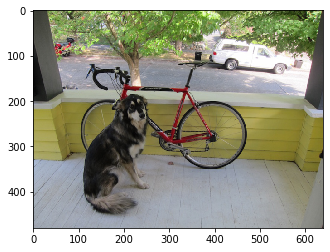

In [35]:
# Resize

'''
2.11. resize - Resize the input PIL Image to the given size.
        - img (PIL Image) – Image to be resized.
        - size (sequence or int) – Desired output size. If size is a sequence like (h, w), the output size will be matched
            to this. If size is an int, the smaller edge of the image will be matched to this number maintaing the 
            aspect ratio. i.e, if height > width, then image will be rescaled to (size×heightwidth,size)
        - interpolation (int, optional) – Desired interpolation. Default is PIL.Image.BILINEAR
'''

img = Image.open(image_name)
print("Original shape: ", img.size)
image = transforms.functional.resize(img, (480, 640), interpolation=2)
print("Resized shape: ", image.size)
plt.imshow(image)



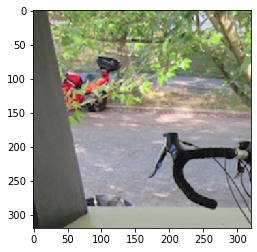

In [36]:
# Resized Crop

'''
2.12. resized_crop - Crop the given PIL Image and resize it to desired size.
        - img (PIL Image) – Image to be cropped.
        - i – Upper pixel coordinate.
        - j – Left pixel coordinate.
        - h – Height of the cropped image.
        - w – Width of the cropped image.
        - size (sequence or int) – Desired output size. Same semantics as scale.
        - interpolation (int, optional) – Desired interpolation. Default is PIL.Image.BILINEAR.

'''

img = Image.open(image_name)
image = transforms.functional.resized_crop(img, 30, 30, 200, 200, (320, 320), interpolation=2)
plt.imshow(image)


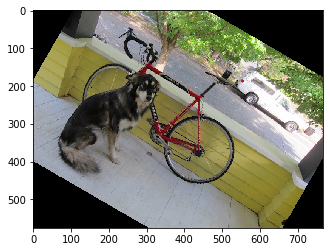

In [37]:
# Rotate

'''
2.13. rotate - Rotate the image by angle.
        - img (PIL Image) – PIL Image to be rotated.
        - angle (float or int) – In degrees degrees counter clockwise order.
        - resample (PIL.Image.NEAREST or PIL.Image.BILINEAR or PIL.Image.BICUBIC, optional) – An optional resampling 
            filter. See filters for more information. If omitted, or if the image has mode “1” or “P”, it is set to 
            PIL.Image.NEAREST.
        - expand (bool, optional) – Optional expansion flag. If true, expands the output image to make it large enough 
            to hold the entire rotated image. If false or omitted, make the output image the same size as the input image.
            Note that the expand flag assumes rotation around the center and no translation.
        - center (2-tuple, optional) – Optional center of rotation. Origin is the upper left corner. Default is the 
            center of the image.

'''

img = Image.open(image_name)
image = transforms.functional.rotate(img, -30, resample=False, expand=False, center=None)
plt.imshow(image)

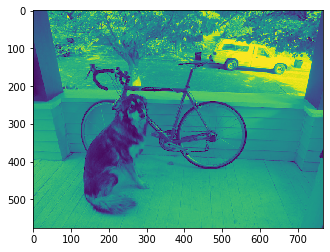

In [38]:
# To Grayscale

'''
2.14. to_grayscale - Convert image to grayscale version of image.
'''

img = Image.open(image_name)
image = transforms.functional.to_grayscale(img, num_output_channels=1)
plt.imshow(image)

In [39]:
# To tensor

'''
2.15. to_tensor - Convert a PIL Image or numpy.ndarray to tensor.
'''

img = Image.open(image_name)
print("Initial type: ", type(img))
image = transforms.functional.to_tensor(img)
print("Converted type: ", type(image))


Initial type:  <class 'PIL.JpegImagePlugin.JpegImageFile'>
Converted type:  <class 'torch.Tensor'>


In [40]:
# To Pillow image

'''
2.16. to_pil_image - Convert a tensor back to Pillow Image
'''

print("Initial type: ", type(image))
image = transforms.functional.to_pil_image(image)
print("Converted type: ", type(image))

Initial type:  <class 'torch.Tensor'>
Converted type:  <class 'PIL.Image.Image'>


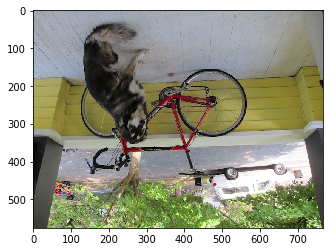

In [41]:
# Vertical Flip

'''
2.17. vflip - Vertically flip the given PIL Image.
'''

img = Image.open(image_name)
image = transforms.functional.vflip(img)
plt.imshow(image)


# Applying transformation on dataset

In [42]:
data_transform = transforms.Compose([transforms.CenterCrop(224),\
                    transforms.ToTensor()])
sample_dataset = datasets.ImageFolder(root='sample_data/train', transform=data_transform)

In [43]:
# On how to access the data refer to - "Tessellate - Data Loaders Example codes" notebook

## Author - Tessellate Imaging - https://www.tessellateimaging.com/

## Monk Library - https://github.com/Tessellate-Imaging/monk_v1

    Monk is an opensource low-code tool for computer vision and deep learning

### Monk features
- low-code
- unified wrapper over major deep learning framework - keras, pytorch, gluoncv
- syntax invariant wrapper


### Enables
- to create, manage and version control deep learning experiments
- to compare experiments across training metrics
- to quickly find best hyper-parameters


### At present it only supports transfer learning, but we are working each day to incorporate
- GUI based custom model creation
- various object detection and segmentation algorithms
- deployment pipelines to cloud and local platforms
- acceleration libraries such as TensorRT
- preprocessing and post processing libraries

## To contribute to Monk AI or Pytorch RoadMap repository raise an issue in the git-repo or dm us on linkedin 
 - Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
 - Akash - https://www.linkedin.com/in/akashdeepsingh01/